In [41]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify

import folium
import json
from branca.colormap import linear
from folium.plugins import HeatMap

In [42]:
import requests
from bs4 import BeautifulSoup
import csv

#建立一個新的CSV檔案寫入資料 
url = "http://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker=2021-08"  
#自訂檔案名稱
csvfile = "exercise2.csv" 
r = requests.get(url)
r.encoding = "utf-8"
soup = BeautifulSoup(r.text,"lxml")

#用BeautifulSoup找到MyTable位置
tag_table = soup.find(id="MyTable") 
#找到要寫入的每個tr
rows = tag_table.findAll("tr") 
 
#將天氣資料寫入weather1.CSV檔
with open(csvfile, "w+",newline="", encoding="utf-8") as fp:
    writer=csv.writer(fp)
    for row in rows:
        rowList=[]
        for data in row.findAll(["td","th"]):    #找到所有<td><th>
            rowList.append(data.get_text().replace("\n","").replace("\r",""))  #移除"\r","\n"
        writer.writerow(rowList)    #資料寫入csv

In [43]:
#將網站資料於jupyter中印出
import requests
r=requests.get("http://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker=2021-08")
print(r.text)




<!DOCTYPE html PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html>
<head>
<link href="css/tablecss.css" rel="stylesheet" type="text/css" />
<script src="js/jquery-3.3.1.js"></script>
<script src="js/Blob.js"></script>
<script src="js/FileSaver.js"></script>
<script src="js/tableexport.js"></script>
<script type="text/javascript">
	var url = "MonthDataController.do?command=viewMain";

	$(function() {
		var preArr = "2021-07".split("-");
		var nexArr = "2021-09".split("-");
		var now = new Date();
		var exportName = "C0AC70-2021-08";

		if (new Date(preArr[0], preArr[1] - 1, 1) < new Date(1995, 0, 1))
			$("#preItem").css("display", "none");
		if (new Date(nexArr[0], nexArr[1] - 1, 1) >= new Date(
				now.getFullYear(), now.getMonth() + 1, 1))
			$("#nexItem").css("display", "none");

		$("#preItem").click(
				function(event) {
					window.location.href = encodeURI(url
							+ "&station=C0AC70&stname="
							+ encodeURI("信義")
							+ "&da

In [44]:
weather = pd.read_csv("exercise2.csv", header=0, parse_dates=["觀測時間(day)"])
weather

,觀測時間(day),測站氣壓(hPa),海平面氣壓(hPa),測站最高氣壓(hPa),測站最高氣壓時間(LST),測站最低氣壓(hPa),測站最低氣壓時間(LST),氣溫(℃),最高氣溫(℃),最高氣溫時間(LST),...,最大六十分鐘降水量(mm),最大六十分鐘降水量起始時間(LST),日照時數(hour),日照率(%),全天空日射量(MJ/㎡),能見度(km),A型蒸發量(mm),日最高紫外線指數,日最高紫外線指數時間(LST),總雲量(0~10)
0,01,991.0,...,992.5,2021-08-01 00:01,989.1,2021-08-01 16:13,27.8,30.8,2021-08-01 13:21,...,...,...,...,...,...,...,...,...,...,...
1,02,990.9,...,992.3,2021-08-02 21:01,989.9,2021-08-02 01:31,28.2,32.9,2021-08-02 10:41,...,...,...,...,...,...,...,...,...,...,...
2,03,991.5,...,993.5,2021-08-03 21:51,990.1,2021-08-03 14:37,27.1,30.5,2021-08-03 11:42,...,...,...,...,...,...,...,...,...,...,...
3,04,992.9,...,994.0,2021-08-04 08:59,991.5,2021-08-04 14:02,28.3,32.6,2021-08-04 12:31,...,...,...,...,...,...,...,...,...,...,...
4,05,991.7,...,993.2,2021-08-05 21:22,990.9,2021-08-05 03:21,28.4,33.6,2021-08-05 10:54,...,...,...,...,...,...,...,...,...,...,...
5,06,990.6,...,992.9,2021-08-06 09:43,988.0,2021-08-06 18:08,26.8,28.3,2021-08-06 13:36,...,...,...,...,...,...,...,...,...,...,...
6,07,990.8,...,996.2,2021-08-07 23:12,987.3,2021-08-07 05:02,25.1,25.9,2021-08-07 23:41,...,...,...,...,...,...,...,...,...,...,...
7,08,997.3,...,1000.2,2021-08-08 22:31,995.0,2021-08-08 01:01,29.3,35.2,2021-08-08 13:23,...,...,...,...,...,...,...,...,...,...,...
8,09,999.6,...,1000.9,2021-08-09 22:31,997.9,2021-08-09 17:59,28.9,34.3,2021-08-09 10:34,...,...,...,...,...,...,...,...,...,...,...
9,10,1000.5,...,1001.8,2021-08-10 22:02,999.3,2021-08-10 03:52,29.0,33.6,2021-08-10 10:11,...,...,...,...,...,...,...,...,...,...,...


DataError: No numeric types to aggregate

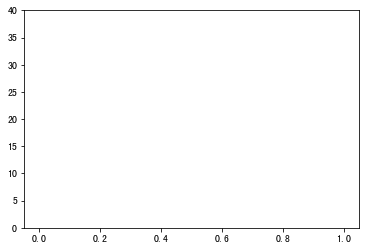

In [45]:
plt.ylim([0,40])

sns.lineplot(data=weather, x="觀測時間(day)", y="氣溫(℃)")

In [46]:
weather.dtypes

觀測時間(day)             object
測站氣壓(hPa)             object
海平面氣壓(hPa)            object
測站最高氣壓(hPa)           object
測站最高氣壓時間(LST)         object
測站最低氣壓(hPa)           object
測站最低氣壓時間(LST)         object
氣溫(℃)                 object
最高氣溫(℃)               object
最高氣溫時間(LST)           object
最低氣溫(℃)               object
最低氣溫時間(LST)           object
露點溫度(℃)               object
相對溼度(%)               object
最小相對溼度(%)             object
最小相對溼度時間(LST)         object
風速(m/s)               object
風向(360degree)         object
最大陣風(m/s)             object
最大陣風風向(360degree)     object
最大陣風風速時間(LST)         object
降水量(mm)               object
降水時數(hour)            object
最大十分鐘降水量(mm)          object
最大十分鐘降水量起始時間(LST)     object
最大六十分鐘降水量(mm)         object
最大六十分鐘降水量起始時間(LST)    object
日照時數(hour)            object
日照率(%)                object
全天空日射量(MJ/㎡)          object
能見度(km)               object
A型蒸發量(mm)             object
日最高紫外線指數              object
日最高紫外線指數時間(LST)       object
總雲量(0~10)     

In [47]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 35 columns):
觀測時間(day)             31 non-null object
測站氣壓(hPa)             31 non-null object
海平面氣壓(hPa)            31 non-null object
測站最高氣壓(hPa)           31 non-null object
測站最高氣壓時間(LST)         31 non-null object
測站最低氣壓(hPa)           31 non-null object
測站最低氣壓時間(LST)         31 non-null object
氣溫(℃)                 31 non-null object
最高氣溫(℃)               31 non-null object
最高氣溫時間(LST)           31 non-null object
最低氣溫(℃)               31 non-null object
最低氣溫時間(LST)           31 non-null object
露點溫度(℃)               31 non-null object
相對溼度(%)               31 non-null object
最小相對溼度(%)             31 non-null object
最小相對溼度時間(LST)         31 non-null object
風速(m/s)               31 non-null object
風向(360degree)         31 non-null object
最大陣風(m/s)             31 non-null object
最大陣風風向(360degree)     31 non-null object
最大陣風風速時間(LST)         31 non-null object
降水量(mm)               31 non-null ob

In [48]:
weather['觀測時間(day)'].astype('int')

0      1
1      2
2      3
3      4
4      5
5      6
6      7
7      8
8      9
9     10
10    11
11    12
12    13
13    14
14    15
15    16
16    17
17    18
18    19
19    20
20    21
21    22
22    23
23    24
24    25
25    26
26    27
27    28
28    29
29    30
30    31
Name: 觀測時間(day), dtype: int32

In [49]:
weather['氣溫(℃)'].astype('float')

0     27.8
1     28.2
2     27.1
3     28.3
4     28.4
5     26.8
6     25.1
7     29.3
8     28.9
9     29.0
10    29.0
11    28.7
12    28.2
13    27.9
14    29.1
15    29.5
16    29.9
17    27.7
18    27.7
19    28.5
20    29.2
21    29.6
22    29.9
23    28.6
24    29.0
25    29.7
26    30.4
27    30.2
28    30.2
29    30.3
30    30.1
Name: 氣溫(℃), dtype: float64

In [50]:
weather.dtypes

觀測時間(day)             object
測站氣壓(hPa)             object
海平面氣壓(hPa)            object
測站最高氣壓(hPa)           object
測站最高氣壓時間(LST)         object
測站最低氣壓(hPa)           object
測站最低氣壓時間(LST)         object
氣溫(℃)                 object
最高氣溫(℃)               object
最高氣溫時間(LST)           object
最低氣溫(℃)               object
最低氣溫時間(LST)           object
露點溫度(℃)               object
相對溼度(%)               object
最小相對溼度(%)             object
最小相對溼度時間(LST)         object
風速(m/s)               object
風向(360degree)         object
最大陣風(m/s)             object
最大陣風風向(360degree)     object
最大陣風風速時間(LST)         object
降水量(mm)               object
降水時數(hour)            object
最大十分鐘降水量(mm)          object
最大十分鐘降水量起始時間(LST)     object
最大六十分鐘降水量(mm)         object
最大六十分鐘降水量起始時間(LST)    object
日照時數(hour)            object
日照率(%)                object
全天空日射量(MJ/㎡)          object
能見度(km)               object
A型蒸發量(mm)             object
日最高紫外線指數              object
日最高紫外線指數時間(LST)       object
總雲量(0~10)     

In [51]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 35 columns):
觀測時間(day)             31 non-null object
測站氣壓(hPa)             31 non-null object
海平面氣壓(hPa)            31 non-null object
測站最高氣壓(hPa)           31 non-null object
測站最高氣壓時間(LST)         31 non-null object
測站最低氣壓(hPa)           31 non-null object
測站最低氣壓時間(LST)         31 non-null object
氣溫(℃)                 31 non-null object
最高氣溫(℃)               31 non-null object
最高氣溫時間(LST)           31 non-null object
最低氣溫(℃)               31 non-null object
最低氣溫時間(LST)           31 non-null object
露點溫度(℃)               31 non-null object
相對溼度(%)               31 non-null object
最小相對溼度(%)             31 non-null object
最小相對溼度時間(LST)         31 non-null object
風速(m/s)               31 non-null object
風向(360degree)         31 non-null object
最大陣風(m/s)             31 non-null object
最大陣風風向(360degree)     31 non-null object
最大陣風風速時間(LST)         31 non-null object
降水量(mm)               31 non-null ob

In [52]:
#將觀測時間(day)由 object 轉型為 int
weather['觀測時間(day)'] = weather['觀測時間(day)'].astype("int")
weather['氣溫(℃)'] = weather['氣溫(℃)'].astype("float")
print(weather)

    觀測時間(day) 測站氣壓(hPa) 海平面氣壓(hPa) 測站最高氣壓(hPa)      測站最高氣壓時間(LST) 測站最低氣壓(hPa)  \
0           1    991.0        ...       992.5   2021-08-01 00:01       989.1    
1           2    990.9        ...       992.3   2021-08-02 21:01       989.9    
2           3    991.5        ...       993.5   2021-08-03 21:51       990.1    
3           4    992.9        ...       994.0   2021-08-04 08:59       991.5    
4           5    991.7        ...       993.2   2021-08-05 21:22       990.9    
5           6    990.6        ...       992.9   2021-08-06 09:43       988.0    
6           7    990.8        ...       996.2   2021-08-07 23:12       987.3    
7           8    997.3        ...      1000.2   2021-08-08 22:31       995.0    
8           9    999.6        ...      1000.9   2021-08-09 22:31       997.9    
9          10   1000.5        ...      1001.8   2021-08-10 22:02       999.3    
10         11   1002.1        ...      1003.6   2021-08-11 21:42      1000.7    
11         12   1001.8      

In [53]:
weather.dtypes

觀測時間(day)               int32
測站氣壓(hPa)              object
海平面氣壓(hPa)             object
測站最高氣壓(hPa)            object
測站最高氣壓時間(LST)          object
測站最低氣壓(hPa)            object
測站最低氣壓時間(LST)          object
氣溫(℃)                 float64
最高氣溫(℃)                object
最高氣溫時間(LST)            object
最低氣溫(℃)                object
最低氣溫時間(LST)            object
露點溫度(℃)                object
相對溼度(%)                object
最小相對溼度(%)              object
最小相對溼度時間(LST)          object
風速(m/s)                object
風向(360degree)          object
最大陣風(m/s)              object
最大陣風風向(360degree)      object
最大陣風風速時間(LST)          object
降水量(mm)                object
降水時數(hour)             object
最大十分鐘降水量(mm)           object
最大十分鐘降水量起始時間(LST)      object
最大六十分鐘降水量(mm)          object
最大六十分鐘降水量起始時間(LST)     object
日照時數(hour)             object
日照率(%)                 object
全天空日射量(MJ/㎡)           object
能見度(km)                object
A型蒸發量(mm)              object
日最高紫外線指數               object
日最高紫外線指數時間

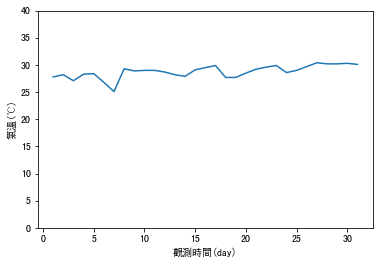

In [54]:
#由於坐標軸的最小值不能為0，所以指定y軸的值
plt.ylim([0,40])

sns.lineplot(data=weather, x="觀測時間(day)", y="氣溫(℃)")

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

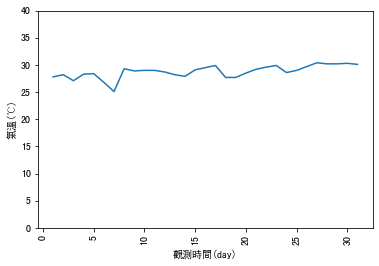

In [55]:
plt.ylim([0,40])

sns.lineplot(data=weather, x="觀測時間(day)", y="氣溫(℃)")

#將x軸翻轉90度
plt.xticks(rotation=90)

In [56]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\Administrator\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

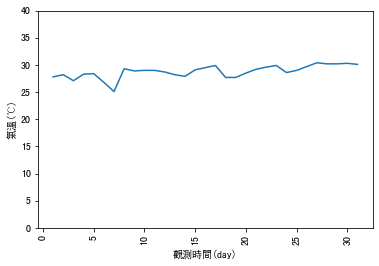

In [57]:
plt.ylim([0,40])

sns.lineplot(data=weather, x="觀測時間(day)", y="氣溫(℃)")
plt.xticks(rotation=90)

In [58]:
#將 object 轉型成 float
weather['最高氣溫(℃)'] = weather['最高氣溫(℃)'].astype("float")
weather['最低氣溫(℃)'] = weather['最低氣溫(℃)'].astype("float")
weather.dtypes

觀測時間(day)               int32
測站氣壓(hPa)              object
海平面氣壓(hPa)             object
測站最高氣壓(hPa)            object
測站最高氣壓時間(LST)          object
測站最低氣壓(hPa)            object
測站最低氣壓時間(LST)          object
氣溫(℃)                 float64
最高氣溫(℃)               float64
最高氣溫時間(LST)            object
最低氣溫(℃)               float64
最低氣溫時間(LST)            object
露點溫度(℃)                object
相對溼度(%)                object
最小相對溼度(%)              object
最小相對溼度時間(LST)          object
風速(m/s)                object
風向(360degree)          object
最大陣風(m/s)              object
最大陣風風向(360degree)      object
最大陣風風速時間(LST)          object
降水量(mm)                object
降水時數(hour)             object
最大十分鐘降水量(mm)           object
最大十分鐘降水量起始時間(LST)      object
最大六十分鐘降水量(mm)          object
最大六十分鐘降水量起始時間(LST)     object
日照時數(hour)             object
日照率(%)                 object
全天空日射量(MJ/㎡)           object
能見度(km)                object
A型蒸發量(mm)              object
日最高紫外線指數               object
日最高紫外線指數時間

In [59]:
#建立資料框架，以觀測時間作(day)為第一個欄位
weather_index = pd.read_csv("weather1.csv", header=0, parse_dates=["觀測時間(day)"], index_col=0)

#讀取"氣溫(℃)", "最高氣溫(℃)", "最低氣溫(℃)"數值資料
tmp_day = weather_index[["氣溫(℃)", "最高氣溫(℃)", "最低氣溫(℃)"]]
tmp_day

,氣溫(℃),最高氣溫(℃),最低氣溫(℃)
觀測時間(day),,,
1,26.5,33.4,23.4
2,28.0,35.0,24.2
3,29.7,37.0,25.6
4,27.5,33.9,24.1
5,24.4,26.6,21.2
6,23.2,24.5,21.6
7,26.0,30.1,23.2
8,28.4,34.2,24.4
9,28.6,33.1,25.1


DataError: No numeric types to aggregate

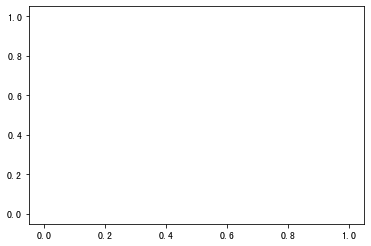

In [60]:
ax = sns.lineplot(data=tmp_day)

plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [61]:
tmp_day.dtypes

氣溫(℃)      object
最高氣溫(℃)    object
最低氣溫(℃)    object
dtype: object

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http:/

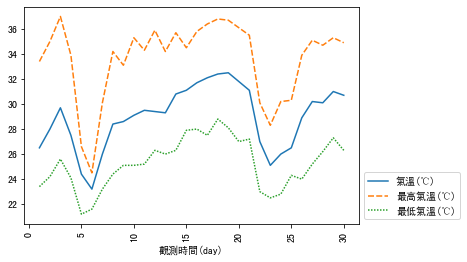

In [62]:
#將 object 轉型成 float
tmp_day['氣溫(℃)'] = tmp_day['氣溫(℃)'].astype("float")
tmp_day['最高氣溫(℃)'] = tmp_day['最高氣溫(℃)'].astype("float")
tmp_day['最低氣溫(℃)'] = tmp_day['最低氣溫(℃)'].astype("float")

#繪製折線圖
ax = sns.lineplot(data=tmp_day)

plt.xticks(rotation=90)

#指定圖例位置
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [63]:
#調整資料的格式
tmp_stack = tmp_day.stack().rename_axis(["觀測時間(day)", "氣溫種類"]).reset_index().rename(columns={0:"溫度(℃)"})
print(tmp_stack)

    觀測時間(day)     氣溫種類  溫度(℃)
0           1    氣溫(℃)   26.5
1           1  最高氣溫(℃)   33.4
2           1  最低氣溫(℃)   23.4
3           2    氣溫(℃)   28.0
4           2  最高氣溫(℃)   35.0
..        ...      ...    ...
85         29  最高氣溫(℃)   35.3
86         29  最低氣溫(℃)   27.3
87         30    氣溫(℃)   30.7
88         30  最高氣溫(℃)   34.9
89         30  最低氣溫(℃)   26.3

[90 rows x 3 columns]


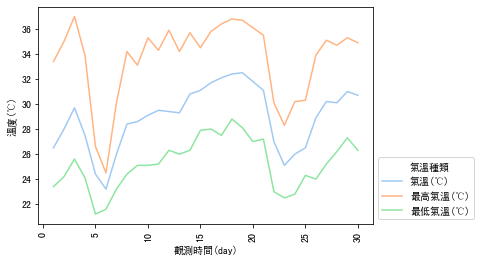

In [64]:
#繪製折線圖
ax = sns.lineplot(data=tmp_stack, x="觀測時間(day)", y="溫度(℃)", hue="氣溫種類", palette="pastel")

#適度調整標籤以及圖例
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

    觀測時間(day)     氣溫種類  溫度(℃)
0           1    氣溫(℃)   26.5
1           1  最高氣溫(℃)   33.4
2           1  最低氣溫(℃)   23.4
3           2    氣溫(℃)   28.0
4           2  最高氣溫(℃)   35.0
..        ...      ...    ...
85         29  最高氣溫(℃)   35.3
86         29  最低氣溫(℃)   27.3
87         30    氣溫(℃)   30.7
88         30  最高氣溫(℃)   34.9
89         30  最低氣溫(℃)   26.3

[90 rows x 3 columns]


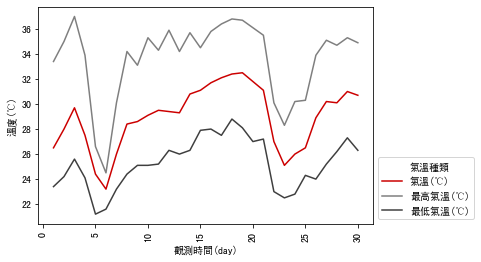

In [65]:
tmp_stack = tmp_day.stack().rename_axis(["觀測時間(day)", "氣溫種類"]).reset_index().rename(columns={0:"溫度(℃)"})
print(tmp_stack)

#計算分類數量
num_category = len(tmp_stack["氣溫種類"].unique())

#設定顏色
point_color = "#CC0000"

#要變更的分類編號(0, 1, 2)
point_number = 0

#建立原始的調色盤
palette = sns.color_palette("binary", num_category)

#變更調色盤的部分顏色
palette[point_number] = point_color

#繪製折線圖
ax = sns.lineplot(data=tmp_stack, x="觀測時間(day)", y="溫度(℃)", hue="氣溫種類", palette=palette)
#適度調整標籤以及圖例
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

    觀測時間(day)     氣溫種類  溫度(℃)
0           1    氣溫(℃)   26.5
1           1  最高氣溫(℃)   33.4
2           1  最低氣溫(℃)   23.4
3           2    氣溫(℃)   28.0
4           2  最高氣溫(℃)   35.0
..        ...      ...    ...
85         29  最高氣溫(℃)   35.3
86         29  最低氣溫(℃)   27.3
87         30    氣溫(℃)   30.7
88         30  最高氣溫(℃)   34.9
89         30  最低氣溫(℃)   26.3

[90 rows x 3 columns]


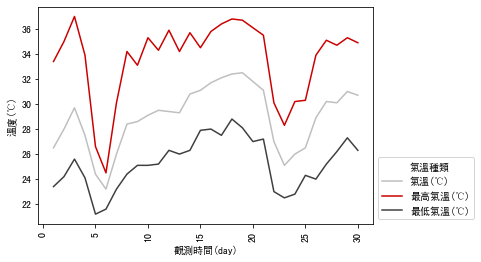

In [66]:
tmp_stack = tmp_day.stack().rename_axis(["觀測時間(day)", "氣溫種類"]).reset_index().rename(columns={0:"溫度(℃)"})
print(tmp_stack)

num_category = len(tmp_stack["氣溫種類"].unique())
point_color = "#CC0000"

point_number = 1
palette = sns.color_palette("binary", num_category)
palette[point_number] = point_color

ax = sns.lineplot(data=tmp_stack, x="觀測時間(day)", y="溫度(℃)", hue="氣溫種類", palette=palette)
plt.xticks(rotation=90)
ax.legend(loc="lower left", bbox_to_anchor=(1,0))

In [67]:
#取得分布圖資料
tmp_ave = go.Scatter(x=weather["觀測時間(day)"], y=weather["氣溫(℃)"], mode="lines", name="氣溫(℃)")
tmp_high = go.Scatter(x=weather["觀測時間(day)"], y=weather["最高氣溫(℃)"], mode="lines", name="最高氣溫(℃)")
tmp_low = go.Scatter(x=weather["觀測時間(day)"], y=weather["最低氣溫(℃)"], mode="lines", name="最低氣溫(℃)")

#指定版面排版方式
layout = go.Layout(xaxis=dict(title="觀測時間(day)"),
                   yaxis=dict(title="溫度(℃)"))

fig = go.Figure(data=[tmp_ave, tmp_high, tmp_low], layout=layout)
fig.show()
fig.show

<bound method BaseFigure.show of Figure({
    'data': [{'mode': 'lines',
              'name': '氣溫(℃)',
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
              'y': array([27.8, 28.2, 27.1, 28.3, 28.4, 26.8, 25.1, 29.3, 28.9, 29. , 29. , 28.7,
                          28.2, 27.9, 29.1, 29.5, 29.9, 27.7, 27.7, 28.5, 29.2, 29.6, 29.9, 28.6,
                          29. , 29.7, 30.4, 30.2, 30.2, 30.3, 30.1])},
             {'mode': 'lines',
              'name': '最高氣溫(℃)',
              'type': 'scatter',
              'x': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
                          19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
              'y': array([30.8, 32.9, 30.5, 32.6, 33.6, 28.3, 25.9, 35.2, 34.3, 33.6, 34.6, 35.9,
                          36.1, 33.2, 32.2, 3

In [68]:
#利用plotly繪製折線圖
fig = px.line(weather, x="觀測時間(day)", y="氣溫(℃)")
fig.show()

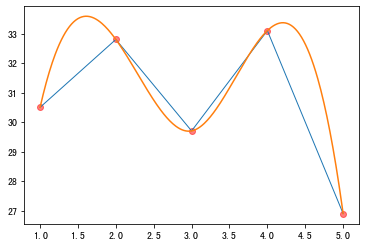

In [69]:
from scipy.interpolate import make_interp_spline

#建立x軸矩陣、y軸矩陣
x = np.array([1,2,3,4,5])
y = np.array([30.5,32.8,29.7,33.1,26.9])

#將x、y軸資料平滑化
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x,y)(x_smooth)

#描點
plt.scatter(x, y, color="red", alpha="0.5")
#未平滑化之前的折線圖
plt.plot(x,y, linewidth=1)

#平滑化後折線圖
plt.plot(x_smooth, y_smooth)
plt.show()

In [70]:
y_smooth

array([30.5       , 30.64900364, 30.79370358, 30.93414508, 31.07037339,
       31.20243376, 31.33037144, 31.45423169, 31.57405974, 31.68990086,
       31.80180029, 31.90980328, 32.0139551 , 32.11430098, 32.21088618,
       32.30375595, 32.39295553, 32.47853019, 32.56052518, 32.63898573,
       32.71395711, 32.78548457, 32.85361335, 32.91838871, 32.9798559 ,
       33.03806017, 33.09304677, 33.14486095, 33.19354796, 33.23915305,
       33.28172148, 33.3212985 , 33.35792935, 33.39165929, 33.42253357,
       33.45059743, 33.47589614, 33.49847494, 33.51837908, 33.53565382,
       33.5503444 , 33.56249607, 33.57215409, 33.57936371, 33.58417018,
       33.58661875, 33.58675467, 33.58462318, 33.58026956, 33.57373903,
       33.56507686, 33.5543283 , 33.54153859, 33.52675299, 33.51001675,
       33.49137511, 33.47087334, 33.44855668, 33.42447038, 33.3986597 ,
       33.37116988, 33.34204617, 33.31133384, 33.27907811, 33.24532426,
       33.21011753, 33.17350317, 33.13552643, 33.09623256, 33.05

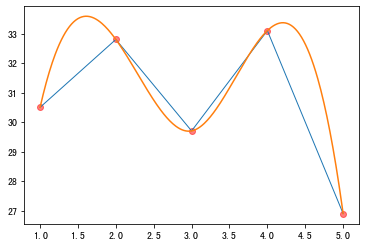

In [71]:
plt.scatter(x, y, color="red", alpha="0.5")
plt.plot(x,y, linewidth=1)

plt.plot(x_smooth, y_smooth)
plt.show()

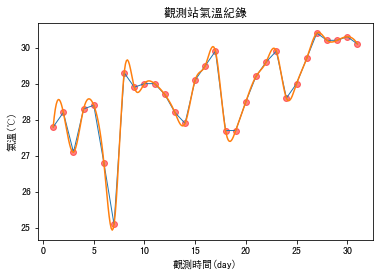

In [72]:
x = np.array(weather["觀測時間(day)"])
y = np.array(weather["氣溫(℃)"])

x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x,y)(x_smooth)

#原本折線圖
plt.scatter(x, y, color="red", alpha="0.5")
plt.plot(x,y, linewidth=1)

#平滑後折線圖
plt.plot(x_smooth, y_smooth)

#加入折線圖標題
plt.title("觀測站氣溫紀錄")

#加入x、y軸標籤
plt.xlabel("觀測時間(day)")
plt.ylabel("氣溫(℃)")
plt.show()

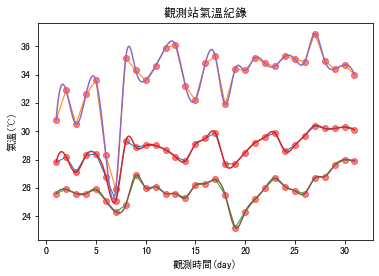

In [73]:
x = np.array(weather["觀測時間(day)"])
y = np.array(weather["氣溫(℃)"])

y1 = np.array(weather["最高氣溫(℃)"])

y2 = np.array(weather["最低氣溫(℃)"])

x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x,y)(x_smooth)
y_smooth1 = make_interp_spline(x,y1)(x_smooth)
y_smooth2 = make_interp_spline(x,y2)(x_smooth)

#原本折線圖
plt.scatter(x, y, color="red", alpha="0.5")
plt.plot(x,y, linewidth=1)

plt.scatter(x, y1, color="red", alpha="0.5")
plt.plot(x,y1, linewidth=1)

plt.scatter(x, y2, color="red", alpha="0.5")
plt.plot(x,y2, linewidth=1)

#平滑後折線圖
plt.plot(x_smooth, y_smooth)
plt.plot(x_smooth, y_smooth1)
plt.plot(x_smooth, y_smooth2)

#加入折線圖標題
plt.title("觀測站氣溫紀錄")

#加入x、y軸標籤
plt.xlabel("觀測時間(day)")
plt.ylabel("氣溫(℃)")
plt.show()

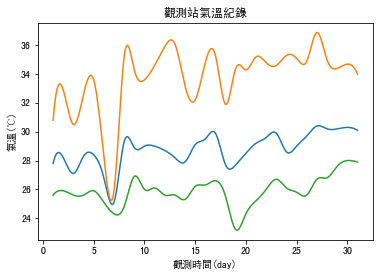

In [79]:
x = np.array(weather["觀測時間(day)"])
y = np.array(weather["氣溫(℃)"])

y1 = np.array(weather["最高氣溫(℃)"])

y2 = np.array(weather["最低氣溫(℃)"])

x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = make_interp_spline(x,y)(x_smooth)
y_smooth1 = make_interp_spline(x,y1)(x_smooth)
y_smooth2 = make_interp_spline(x,y2)(x_smooth)


#平滑後折線圖
plt.plot(x_smooth, y_smooth)
plt.plot(x_smooth, y_smooth1)
plt.plot(x_smooth, y_smooth2)

#加入折線圖標題
plt.title("觀測站氣溫紀錄")

#加入x、y軸標籤
plt.xlabel("觀測時間(day)")
plt.ylabel("氣溫(℃)")
plt.show()